# A Study of Student Performance in Exams
A dataset entitled [Student's Performance in Exams]('https://www.kaggle.com/spscientist/students-performance-in-exams') observed the test scores in the subjects of math, reading, and writing while observing secondary variables such as gender, race/ethnicity, highest level of parental education between a student's parents, lunch program cost, and whether or not the student completed test preparation.

This notebook begins with an introductory analysis of the data then continues into a three-step research proposal in which:
1. The **experimental hypothesis** (null and alternative) is introduced
2. A **rollout plan** describing the method of implementation is discussed
3. An **evaluation plan** where the measurements of what constitutes as a successful experiment are presented

In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import ttest_ind

In [285]:
df = pd.read_csv('C:\\Users\\paulb\\OneDrive\\Desktop\\Data Science\\Exercises\\Curriculum\\1.5.1 Drill\\StudentsPerformance.csv')
df.columns = ['gender', 'race', 'parent_education', 'lunch','test_prep', 'math_score', 'reading_score', 'writing_score']
df['average_score'] = (df['math_score'] + df['reading_score'] + df['writing_score']) / 3

### Introductory Analysis

In [286]:
df.head()

,gender,race,parent_education,lunch,test_prep,math_score,reading_score,writing_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [287]:
#Locating all variables in df
print(df.gender.unique())
print(df.race.unique())
print(df.parent_education.unique())
print(df.lunch.unique())
print(df.test_prep.unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [288]:
df.describe()

,math_score,reading_score,writing_score,average_score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


In [289]:
df.isnull().sum()

gender              0
race                0
parent_education    0
lunch               0
test_prep           0
math_score          0
reading_score       0
writing_score       0
average_score       0
dtype: int64

In [290]:
#Observing scores across race groups
race = df.groupby('race').agg('mean')
race

,math_score,reading_score,writing_score,average_score
race,,,,
group A,61.629213,64.674157,62.674157,62.992509
group B,63.452632,67.352632,65.600000,65.468421
group C,64.463950,69.103448,67.827586,67.131661
group D,67.362595,70.030534,70.145038,69.179389
group E,73.821429,73.028571,71.407143,72.752381


Across groups, we notice a distinct distributions where the average differences between race/ethnicity groups are noticeable.

In [291]:
#Observing scores across parent education
df.groupby('parent_education').mean()

,math_score,reading_score,writing_score,average_score
parent_education,,,,
associate's degree,67.882883,70.927928,69.896396,69.569069
bachelor's degree,69.389831,73.000000,73.381356,71.923729
high school,62.137755,64.704082,62.448980,63.096939
master's degree,69.745763,75.372881,75.677966,73.598870
some college,67.128319,69.460177,68.840708,68.476401
some high school,63.497207,66.938547,64.888268,65.108007


With the exception of 'high school' and 'some high school', the trends perfectly follow the expected pattern of greater parental education positively affecting their children's education.

In [292]:
df.groupby('lunch').mean()

,math_score,reading_score,writing_score,average_score
lunch,,,,
free/reduced,58.921127,64.653521,63.022535,62.199061
standard,70.034109,71.654264,70.823256,70.837209


In the above cell, we see a potential correlation between lunch type and average score. However, it would be unreasonable to assume raising the cost of lunch would improve scores. Working under the assumption that schools that offer standard lunch are in wealthier, more economically developed geographic locations, the issue is not changing food accessibility but increasing economic/educational development.

In [293]:
lunch_groups = df.groupby(['lunch', 'parent_education'])['average_score'].agg(['mean','count'])
lunch_groups['perc_count'] = lunch_groups['count']/lunch_groups['count'].sum()
lunch_groups

mean  count  perc_count
lunch        parent_education                                
free/reduced associate's degree  65.428571     77       0.077
             bachelor's degree   67.053030     44       0.044
             high school         57.376190     70       0.070
             master's degree     67.111111     24       0.024
             some college        62.970464     79       0.079
             some high school    57.224044     61       0.061
standard     associate's degree  71.767816    145       0.145
             bachelor's degree   74.819820     74       0.074
             high school         66.275132    126       0.126
             master's degree     78.047619     35       0.035
             some college        71.435374    147       0.147
             some high school    69.183616    118       0.118

The additional *perc_count* column illustrates the heavier density of the population in the "standard" lunch group. While the dataset does not provide more economic data on where the "free/reduced" lunch groups are located, it is most likely government-funded programs in lower economic areas. It would be interesting to observe how similar economic areas differ in scores when comparing the lunch cost.

### Step 1. Experimental Hypothesis
#### Making the Case for Focusing on the Variable Test Preparation
While there are a variety of approaches one could take to improve student scores, the most beneficial and practical variable that positively affects the average test score is whether or not the student completed the test preparation. For a high-level visualization supporting this claim, see the histogram below: 

In [294]:
complete_test_prep = df[df['test_prep'] == 'completed']
incomplete_test_prep = df[df['test_prep'] == 'none']

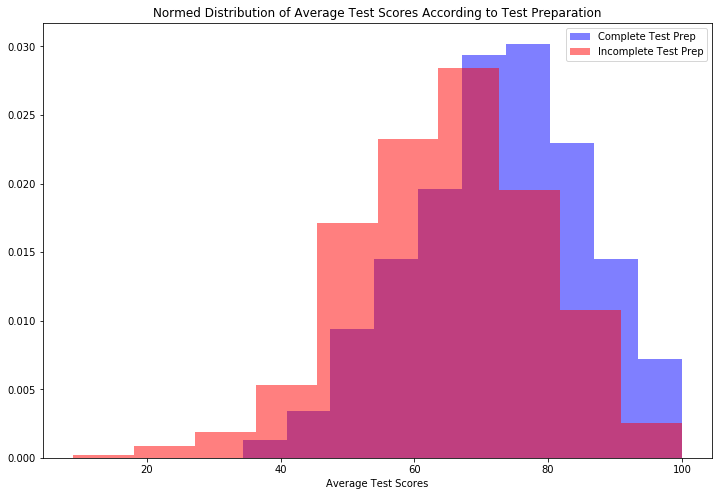

In [295]:
plt.figure(figsize=[12,8])
plt.hist(complete_test_prep['average_score'], normed=True, color='blue', alpha=.5) 
plt.hist(incomplete_test_prep['average_score'], normed=True, color='red', alpha=.5)
plt.title('Normed Distribution of Average Test Scores According to Test Preparation')
plt.legend(['Complete Test Prep','Incomplete Test Prep'])
plt.xlabel('Average Test Scores')
plt.show()

As you can see in the graph and visualization below, the test preparation has a positive affect across all subjects.

        math_score  reading_score  writing_score  average_score
mean     69.695531      73.893855      74.418994       72.66946
median   69.000000      75.000000      76.000000       73.50000
std      14.444699      13.638384      13.375335       13.03696
        math_score  reading_score  writing_score  average_score
mean     64.077882      66.534268      64.504673      65.038941
median   64.000000      67.000000      65.000000      65.333333
std      15.192376      14.463885      14.999661      14.186707


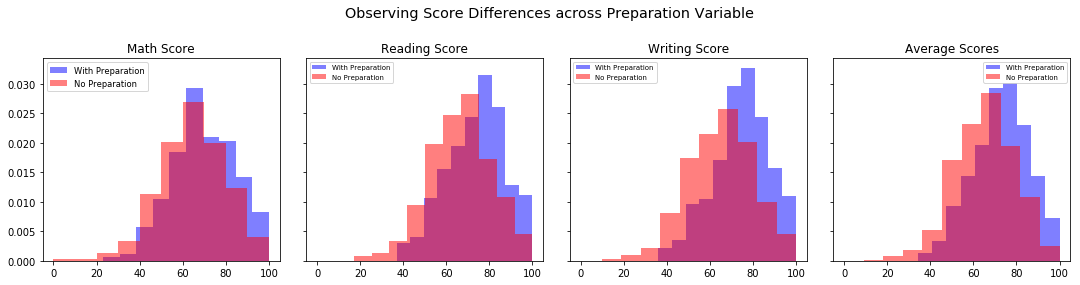

In [296]:
print(df[df.test_prep == 'completed'].agg({'math_score':['mean','median','std'],
                                           'reading_score':['mean','median','std'],
                                           'writing_score':['mean','median','std'],
                                           'average_score':['mean', 'median','std']}))
print(df[df.test_prep == 'none'].agg({'math_score':['mean','median','std'],
                                           'reading_score':['mean','median','std'],
                                           'writing_score':['mean','median','std'],
                                             'average_score':['mean', 'median','std']}))

fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(15,4))
fig.suptitle('Observing Score Differences across Preparation Variable', fontsize='x-large')
fig.tight_layout()
fig.subplots_adjust(top=.8, hspace=.5)
axs[0].hist(df.math_score[df.test_prep == 'completed'], normed=True, color='b', alpha=.5)
axs[0].hist(df.math_score[df.test_prep == 'none'], normed=True, color='r', alpha=.5)
axs[0].legend(fontsize='small', loc=2, labels=['With Preparation','No Preparation'])
axs[0].title.set_text('Math Score')
axs[1].hist(df.reading_score[df.test_prep == 'completed'], normed=True, color='b', alpha=.5)
axs[1].hist(df.reading_score[df.test_prep == 'none'], normed=True, color='r', alpha=.5)
axs[1].legend(fontsize='x-small', labels=['With Preparation','No Preparation'])
axs[1].title.set_text('Reading Score')
axs[2].hist(df.writing_score[df.test_prep == 'completed'], normed=True, color='b', alpha=.5)
axs[2].hist(df.writing_score[df.test_prep == 'none'], normed=True, color='r', alpha=.5)
axs[2].legend(fontsize='x-small', labels=['With Preparation','No Preparation'])
axs[2].title.set_text('Writing Score')
axs[3].hist(df.average_score[df.test_prep == 'completed'], normed=True, color='b', alpha=.5)
axs[3].hist(df.average_score[df.test_prep == 'none'], normed=True, color='r', alpha=.5)
axs[3].title.set_text('Average Scores')
axs[3].legend(fontsize='x-small', labels=['With Preparation','No Preparation'])

plt.show()

In [297]:
df.groupby(['test_prep', 'race'])['math_score','reading_score','writing_score','average_score'].agg(['mean','median','std','count'])

math_score                         reading_score         \
                        mean median        std count          mean median   
test_prep race                                                              
completed group A  68.258065   72.0  16.453911    31     71.032258   72.0   
          group B  67.191176   65.5  14.339443    68     72.852941   74.5   
          group C  67.495726   67.0  14.282026   117     73.658120   75.0   
          group D  69.792683   69.5  12.804067    82     74.146341   75.0   
          group E  77.433333   79.0  13.653542    60     76.666667   75.0   
none      group A  58.086207   58.0  12.102319    58     61.275862   60.5   
          group B  61.368852   62.0  15.736572   122     64.286885   64.0   
          group C  62.707921   63.0  14.927981   202     66.465347   67.0   
          group D  66.255556   67.5  14.082805   180     68.155556   68.5   
          group E  71.112500   72.0  16.371474    80     70.300000   72.5   

                                   writing_score                          \
                         std count          mean median        std count   
test_prep race                                                             
completed group A  16.073755    31     70.903226   74.0  15.038517    31   
          group B  13.109487    68     71.882353   73.5  13.468071    68   
          group C  13.996405   117     74.452991   77.0  13.556075   117   
          group D  12.707655    82     76.658537   77.5  12.318028    82   
          group E  13.361552    60     75.983333   76.0  12.981723    60   
none      group A  14.258015    58     58.275862   58.0  13.923088    58   
          group B  15.432862   122     62.098361   63.0  15.696191   122   
          group C  13.335371   202     63.990099   65.0  14.449084   202   
          group D  14.041368   180     67.177778   69.0  14.284482   180   
          group E  15.438240    80     67.975000   69.0  15.755228    80   

                  average_score                              
                           mean     median        std count  
test_prep race                                               
completed group A     70.064516  73.000000  15.302970    31  
          group B     70.642157  70.666667  12.875255    68  
          group C     71.868946  72.666667  13.207811   117  
          group D     73.532520  74.333333  11.824489    82  
          group E     76.694444  76.833333  12.612476    60  
none      group A     59.212644  59.333333  12.535128    58  
          group B     62.584699  62.833333  14.959530   122  
          group C     64.387789  65.666667  13.533277   202  
          group D     67.196296  68.666667  13.423475   180  
          group E     69.795833  70.666667  15.290575    80

For the most concise visualization of the positive effects across the variety of racial groups, observe the violin plot below. For a breakdown of the actual figures, see the graph two cells below where the increase can be quantified across groups - for a total percentage increase of 9.9% across all groups.

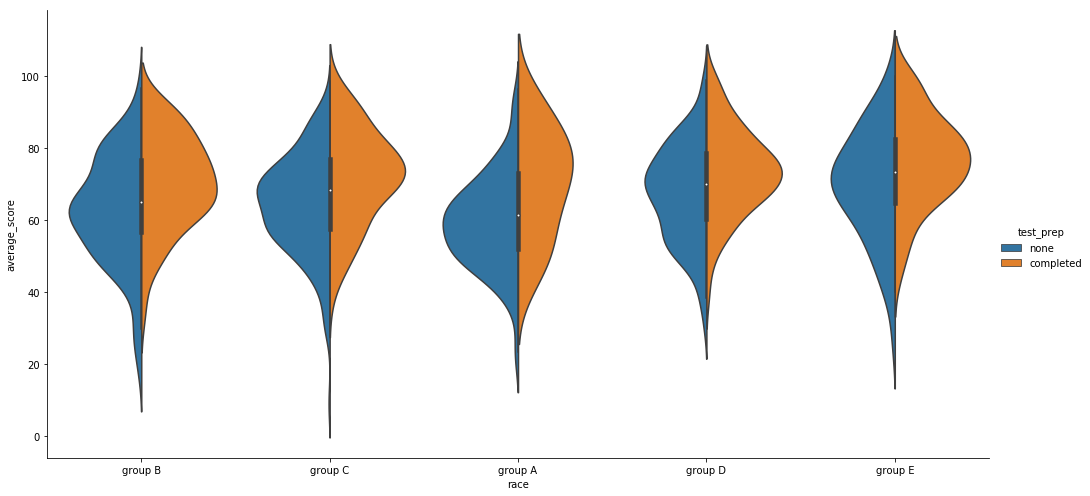

In [298]:
sns.catplot(x="race", y="average_score", hue="test_prep",
            kind="violin", split=True, data=df, height=7, aspect=2)

In [299]:
a = df.groupby(['race','test_prep'])['average_score'].mean()
a

race     test_prep
group A  completed    70.064516
         none         59.212644
group B  completed    70.642157
         none         62.584699
group C  completed    71.868946
         none         64.387789
group D  completed    73.532520
         none         67.196296
group E  completed    76.694444
         none         69.795833
Name: average_score, dtype: float64

In [300]:
mean_comp = (a[0]+a[2]+a[4]+a[6]+a[8])/4
mean_incomp = (a[1]+a[3]+a[5]+a[7]+a[9])/4
print(mean_comp)
print(mean_incomp)
print(mean_comp-mean_incomp)

90.70064590759273
80.79431538505509
9.906330522537644


As consistently effective as the test preparation is, only 35.8% of students are currently completing the specified preparation course - leaving the 64.2% majority with no completion of preparation. Considering that this is a easily controllable variable of change, this will be the primary variable of focus in the attempt to improve student scores in all subjects.

In [301]:
print(df.groupby('test_prep').count().drop(['math_score', 'reading_score', 'writing_score'], axis=1))

           gender  race  parent_education  lunch  average_score
test_prep                                                      
completed     358   358               358    358            358
none          642   642               642    642            642


#### Testing the Working Hypothesis on the Observeable Results of Test Preparation

With the data at hand, we will compute the probability of the **null hypothesis** - that **increasing student involvement in the test preparation course will have no effect on the overall student grade.** This will be considered false if its p-value falls below the arbitrary standard of 5%. If the null hypothesis is proven to be statistically unlikely by this measurement, we will accept the alternative hypothesis - that increasing student involvement in the test preparation course will have a positive effect on the overall student grade.

In [302]:
no_prep = df[df['test_prep'] == 'none']
yes_prep = df[df['test_prep'] == 'completed']
t_value, p_value = ttest_ind(yes_prep['average_score'], no_prep['average_score'], equal_var=False)
print(t_value)
print(f'{p_value:.20f}')

8.594538326688614
0.00000000000000004427


Given the standard deviations of both completed and non-completed test preparation groups and their sample sizes, the difference in average score means between the groups is 8.59 points (t-value above). The statistical likelihood that this would occur in the population group (without test preparation) is incredibly low at 0.000000000000004427% (p-value above). This confidently establishes the value of test preparation when studying the scores of students.

Since this is well below the pre-defined standard of 5%, we can safely reject the null hypothesis that the test preparation has no effect on the average student's average test scores. Moreover, since this p-value was predicted according to a two-tailed distribution and since there are only noticeable improvements, the chances of the test preparation actually improving (instead of merely affecting positively or negatively) a student's test scores is even higher on a one-tailed distribution since we do not have reason to believe the preparation to hinder a student's scores.

#### Presenting the Hypotheses to Be Used in the Future Experiment:

Considering the alternative hypothesis provides a confidence interval of over 99.9% according to the data at hand, we will repeat the null hypothesis for the future experiment: **increasing student involvement in the test preparation course will have no effect on the overall student grade.** In tandem, the alternative hypothesis for which we will argue is that **increasing student involvement in the test preparation course will have a positive effect on the overall student grade.**

In short, the potential solution to improving the grades of students will be by increasing their involvement in the test preparation course.

### Step 2. Rollout Plan

Since the two test-participation groups are currently split at appriximately 1/3 (for students who completed the course) and 2/3 (students who did not complete the course), the rollout plan is to effectively flip those fractions so that the control group of students who did not complete the course becomes 33% and those who complete the course are at 66%. Doing this will allow an A/B test where the control group of those who will not complete the course (33%) will be compared against the larger 66% of students who will be participating.

Resembling the current study, this experiment will take place over the course of a school term in order to replicate the same study and measure the expected progress against the former term. In this way, we will have both an A/B comparison within the same future term as well as an A/B comparison across the former and future terms where the ratios of non-test-prep and test-prep groups are 35.8/64.2 and 66.7/33.3 respectively.

Since we will be observing the same grade levels of students where students will differ, this experiment will be a pooled cross-sectional study instead of panel data. The selection of the 66% of participants will be at random since all groups see a  percentage increase through participation in the test prep course. The same secondary variables will be recorded at the end of the study for consistency across the experiments.

### Step 3. Evaluation Plan

As mentioned above, the primary variable of focus will be the student's participation in the test preparation course. With the new study observing the progress of a 66% participation rate in the test preparation, we will consider the experiment a success if the results from the former study scale to the future.

Elaborating, in the current study, 35.8% of students participated in the test preparation course and received an average score across subjects of 72.66946%. The other 64.2% of students who did not participate, on the other hand, received an average of 65.038941%. As a result, the average of the entire population was 67.770667%. If this proposed experiment scales like the previous experiment, the entire population should see an increase from 67.770667% to 69.425%.

In conclusion, this experiment will be considered a success if it meets the following two conditions: (1) **the entire population will experience an overall grade increase of 1.6%** and (2) **the new sample group of test-preparations participators continues to have an average of 7 points higher than the control group.**